In [301]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [302]:
df = pd.read_csv("cereal.csv",sep=";")

In [303]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912


In [304]:
df = df.iloc[1:]
df.drop(["name"],axis=1,inplace=True)

In [305]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
5,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843


In [306]:
# df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
#        'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']].astype("float")

df = df.astype({'calories':'float', 'protein':'float', 'fat':'float', 'sodium':'float', 'fiber':'float', 'carbo':'float',
       'sugars':'float', 'potass':'float', 'vitamins':'float', 'shelf':'float', 'weight':'float', 'cups':'float', 'rating':'float'})
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,1.0,0.33,68.402973
2,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,1.0,1.00,33.983679
3,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1.0,0.33,59.425505
4,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,1.0,0.50,93.704912
5,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,-1.0,25.0,3.0,1.0,0.75,34.384843


In [310]:
df['sodium2'] = df['sodium'].apply(lambda x:float(x*2) + np.random.normal(0,5,1))
df['sodium2'] = df['sodium2'].astype("float")

In [311]:
columns = df.columns
columns

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating',
       'sodium2'],
      dtype='object')

In [312]:
df = pd.get_dummies(df, columns=['mfr','type'])
df.dropna(inplace=True)

In [314]:
X = df.drop(["rating"],axis=1,inplace=False)
y = df[["rating"]]

In [315]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X[['calories', 'protein', 'fat', 'sodium','sodium2','fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C',
       'type_H']] = scaler.fit_transform(
    X[['calories', 'protein', 'fat', 'sodium','sodium2','fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C',
       'type_H']])

In [317]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [322]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

linear_model.fit(X_train,y_train)
lasso_model.fit(X_train,y_train)
ridge_model.fit(X_train,y_train)
elasticnet_model.fit(X_train,y_train)


ElasticNet()

In [319]:
linear_model.score(X_test,y_test)

0.9999999999999983

In [320]:
lasso_model.score(X_test,y_test)

0.5208424596455856

In [321]:
ridge_model.score(X_test,y_test)

0.8703501345303687

In [323]:
elasticnet_model.score(X_test,y_test)

0.29097558109500665

# 3.2 Gradient Descent

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

model_params = {
    
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
             'max_depth':[2,5,10,15,20,25,35,40,55,60,75,90,110,150,200,250,500]
         }  
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
             'max_depth':[2,5,10,15,20,25]
         }
    },
    'knn_regression' : {
        'model': KNeighborsRegressor(),
        'params' : {
             'n_neighbors':[2,5,10,15,20,50]
         }
    }
}

In [222]:
# Model Selection and hyper-parameter tuning 
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\029338502\AppData\L

C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\029338502\AppData\L

C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 705, in score
    y_pred = self.predict(X)
  File "C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_regression.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  

,model,best_score,best_params
0,decision_tree,0.596588,{'max_depth': 5}
1,random_forest,0.826176,{'max_depth': 15}
2,knn_regression,NaN,{'n_neighbors': 2}


In [152]:
Theta

array([[193273.24739474],
       [519310.39717886],
       [-54050.25770382]])

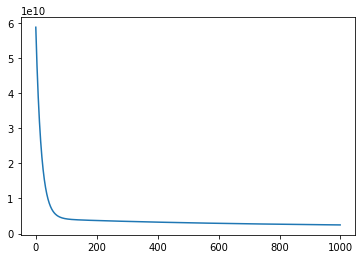

In [153]:
plt.plot(np.arange(0,1000),cost_hist[0:1000])

# 3.3 Normal Equations

In [154]:
theta = np.dot(np.linalg.inv(np.dot(X_train, X_train.T)), np.dot(X_train, y_train.T))

In [155]:
theta

array([[193273.24739475],
       [519310.39717892],
       [-54050.25770387]])

In [159]:
np.dot(theta.T,np.array([1,1650,3]))

array([8.56893278e+08])

In [ ]:
np.random.rand()